<a href="https://colab.research.google.com/github/pawan-cpu/Learn-Python-with-Pawan-Kumar/blob/main/Pro15Jan_Pawan_Kumar__Applied_Tech_Project_61_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Simple Linear Regression - Model Evaluation
 
 2. Simple Linear Regression - Residual Analysis
 

---

#### Getting Started:

1. Click on this link to open the Colab file for this project.

  https://colab.research.google.com/drive/1XoM9UIhihy3gnJykFBL2-CYNHFfljtgx

2. Create a duplicate copy of the Colab file as described below.

  - Click on the **File menu**. A new drop-down list will appear.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

  - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

3. After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project61** format.

4. Now, write your code in the prescribed code cells.


---

### Problem Statement

While working in a job environment, the monetary gained value is 'Salary' which is different for every person based on various parameters. 

Build a model that is capable of predicting the salary of a person based on his/her **years of experience** using simple linear regression. Also, evaluate the accuracy of your model by performing residual analysis.






---

### List of Activities

**Activity 1:** Analysing the Dataset

  
**Activity 2:**  Train-Test Split

**Activity 3:**  Model Training

**Activity 4:** Model Prediction 

**Activity 5:** Residual Analysis








---


#### Activity 1:  Analysing the Dataset

- Create a Pandas DataFrame for **Salary** dataset using the below link. This dataset consists of following columns:

|Field|Description|
|---:|:---|
|YearsExperience|Years of experience of a person|
|Salary|Salary of a person|

  **Dataset Link:** https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/salary.csv
  
- Print the first five rows of the dataset. Check for null values and treat them accordingly.

- Create a regression plot with `YearsExperience` on X-axis and `Salary` on Y-axis to identify the relationship between these two attributes.




In [ ]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
# Dataset Link: 'https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/salary.csv'
df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/salary.csv')
df
# Print first five rows using head() function
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

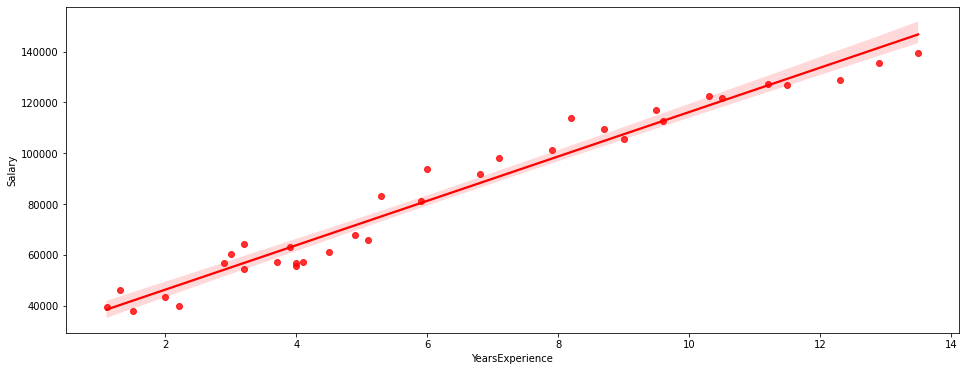

In [ ]:
# Create a regression plot between 'YearsExperience' and 'Salary'
plt.figure(figsize=(16,6))
sns.regplot(df['YearsExperience'],df['Salary'],color='red')
plt.show()

---

#### Activity 2: Train-Test Split

We have to determine the effect of `YearsExperience` on income. Thus, `YearExperience` is the feature variable and `Salary` is the target variable. 

Split the dataset into training set and test set such that the training set contains 80% of the instances and the remaining instances will become the test set.

In [ ]:
# Split the DataFrame into the training and test sets.
from sklearn.model_selection import train_test_split

X = df['YearsExperience'] 
y = df['Salary'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

---

#### Activity 3: Model Training

Implement simple linear regression using `sklearn` module in the following way:

1. Reshape the feature and the target variable arrays into two-dimensional arrays by using `reshape(-1, 1)` function of numpy module.
2. Deploy the model by importing the `LinearRegression` class and create an object of this class.
3. Call the `fit()` function on the LinearRegression object and print the slope and intercept values of the best fit line.


In [ ]:
# 1. Create two-dimensional NumPy arrays for the feature and target variables. 
# Print the shape or dimensions of these reshaped arrays

X_train_reshaped = X_train.values.reshape(-1, 1)
y_train_reshaped = y_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

print(X_train_reshaped.shape)
print(X_test_reshaped.shape)
print(y_train_reshaped.shape)
print(y_test_reshaped.shape)



(28, 1)
(7, 1)
(28, 1)
(7, 1)


In [ ]:
# S3.3: Deploy linear regression model using the 'sklearn.linear_model' module.
from sklearn.linear_model import LinearRegression
# 1. Import the 'LinearRegression' class from the 'sklearn.linear_model'.


# 2. Create an object of the 'LinearRegression' class.
lr = LinearRegression()

# 3. Call the 'fit()' function
lr.fit(X_train_reshaped , y_train_reshaped)

# 4. Print the slope and intercept values.
print("intercept = ",lr.intercept_[0])
print('slope  = ' , lr.coef_[0])

intercept =  29078.626034406887
slope  =  [8578.76747669]


---

#### Activity 4: Model Prediction 

Predict the values for the training and test set by calling the `predict()` function on the LinearRegression object.

Suppose you got a candidate having 15 years of experience. Calculate the best salary you should offer to him according to this prediction model.

**Note:** We know that `sklearn.linear_model` module accepts two-dimensional arrays. To predict the salary of a person with 15 years of experience, convert `15` into 2D array and then pass it to the `predict()` function as follows:

`predict([[15]])`

In [ ]:
# Predict the target variable values for the training and test set
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
y_train_pred = lr.predict(X_train_reshaped)
y_test_pred = lr.predict(X_test_reshaped)


In [ ]:
# Predict salary of a person having 15 years of experience
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
y_train_pred = lr.predict([[15]])
print(y_train_pred )

[[157760.1381847]]


**Q:** What is the best salary you can offer to the candidate having 15 years of experience?

**A:** 157760

---

#### Activity 5: Residual Analysis

Check if the error terms are normally distributed using the histogram between errors (calculated by the difference of actual and predicted values) for both training and testing data.

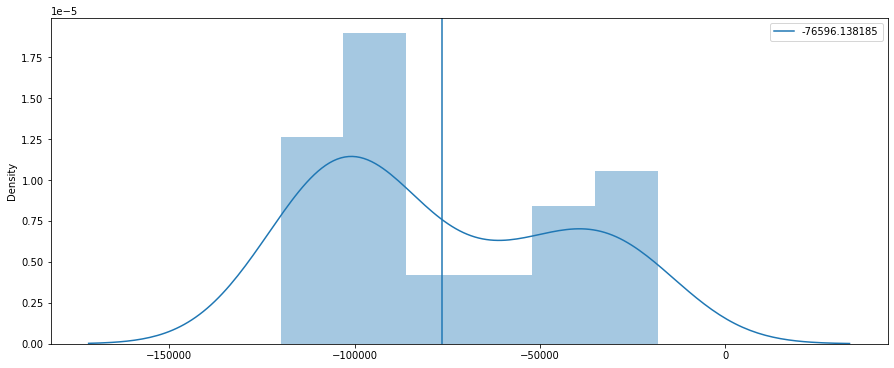

In [ ]:
# Create a histogram for the errors obtained in the predicted values for the train set.
errors_train=y_train_reshaped-y_train_pred
plt.figure(figsize=(15,6))
sns.distplot(errors_train,bins='sturges')
plt.axvline(errors_train.mean(),label=f'{errors_train.mean():3f}')
plt.legend()
plt.show()

**Q:** What is the mean of errors for the training set?

**A:** -76596



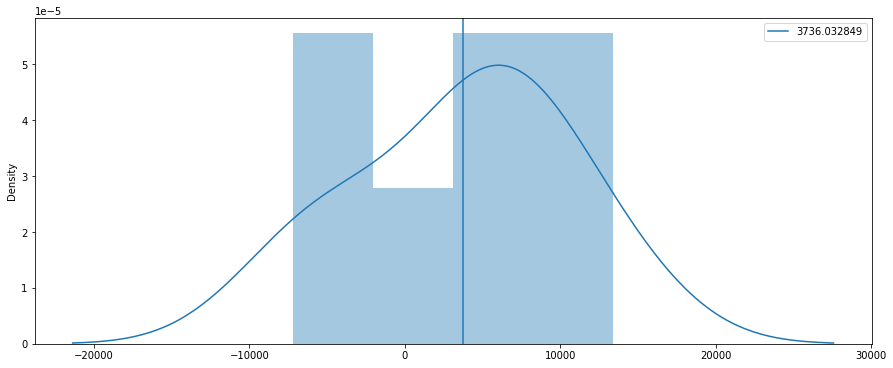

In [ ]:
# Create a histogram for the errors obtained in the predicted values for the test set.
errors_test=y_test_reshaped-y_test_pred
plt.figure(figsize=(15,6))
sns.distplot(errors_test,bins='sturges')
plt.axvline(errors_test.mean(),label=f'{errors_test.mean():3f}')
plt.legend()
plt.show()

**Q:** What is the mean of errors?Is it zero?

**A:** 3736


---

### Submitting the Project:

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, make sure that '**Anyone on the Internet with this link can view**' option is selected and then click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>

3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_Project61**) of the notebook will get copied 

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.
   
   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_Project61** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800> 

---